### Day_50_solution

### Q1. Problem Statement: Principal Component Analysis (PCA)


  
     Load the "vehicle.csv"dataset into a DataFrame and perform the following tasks:
     1.Find   out   the   null   values   in   the   DataFrame   and   drop   them   using dropna()function
    2.Considering the "class"column as the target variable/column, separate the target and the feature vectors
    3.Scale the numeric data in the independent variables (Feature vectors) using the Standard scalar
    4.Convert  the  independent  variables  into   2-D  data  using  PCA   (Principal Component Analysis)
    5.Combine the target data with the 2-D independent data/feature vectors to create final DataFrame
    6.Plot the final DataFrame using a scatter plot
    7.Calculate the variance ratio of the 2-D data converted using PCA



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("vehicle.csv")

# Check for null values
print(df.isnull().sum())


compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [2]:
# Drop null values
df.dropna(inplace=True)

In [12]:
# Separate target and feature vectors
X = df.drop(columns=["class"])
y = df["class"]

In [15]:
X

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

In [16]:
y

0      van
1      van
2      car
3      van
4      bus
      ... 
841    car
842    van
843    car
844    car
845    van
Name: class, Length: 813, dtype: object

In [17]:
from sklearn.preprocessing import StandardScaler

# Scale the numeric data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.16323063,  0.52040788,  0.06066872, ...,  0.37128716,
        -0.3218087 ,  0.17183708],
       [-0.32287376, -0.61912319,  0.12406675, ...,  0.14710858,
         0.00340009,  0.44231829],
       [ 1.2569655 ,  0.84598818,  1.51882349, ..., -0.41333788,
        -0.1592043 ,  0.03659647],
       ...,
       [ 1.5000177 ,  1.49714879,  1.20183332, ..., -0.97378433,
        -0.3218087 ,  0.7127995 ],
       [-0.93050425, -1.43307395, -0.25632145, ...,  1.38009078,
         0.16600449, -0.09864413],
       [-1.05203035, -1.43307395, -1.01709784, ...,  0.59546574,
        -0.4844131 , -0.77484716]])

In [23]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

principalDf = pd.DataFrame(data = X_pca
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0               0.352249              -0.141027
1              -1.578072              -0.422197
2               3.782556               0.253257
3              -1.713214              -2.819496
4               0.532165               5.153595

In [26]:
# Combine target and 2-D independent data
df_final = pd.DataFrame(X_pca, columns=["PCA1", "PCA2"])
df_final["class"] = y.values
df_final.head()

PCA1      PCA2 class
0  0.352249 -0.141027   van
1 -1.578072 -0.422197   van
2  3.782556  0.253257   car
3 -1.713214 -2.819496   van
4  0.532165  5.153595   bus

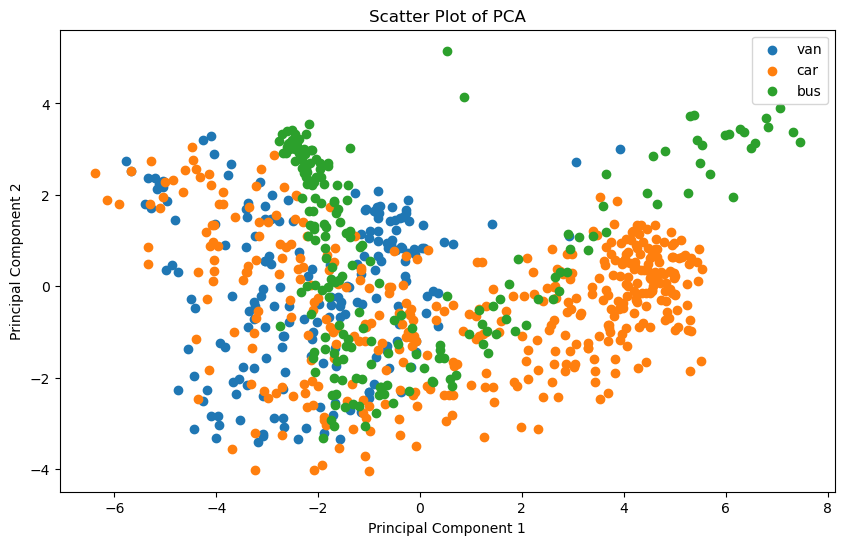

In [7]:
import matplotlib.pyplot as plt

# Plot scatter plot
plt.figure(figsize=(10, 6))
classes = df_final["class"].unique()
for class_name in classes:
    plt.scatter(df_final.loc[df_final["class"] == class_name, "PCA1"],
                df_final.loc[df_final["class"] == class_name, "PCA2"],
                label=class_name)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatter Plot of PCA")
plt.legend()
plt.show()


In [8]:
# Variance ratio of PCA components
variance_ratio = pca.explained_variance_ratio_
print("Variance Ratio of PCA Components:", variance_ratio)


Variance Ratio of PCA Components: [0.52454218 0.16588564]
